In [3]:
%pip install numpy==1.19.5
%pip install matplotlib==3.2.2
%pip install seaborn==0.11.1

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [282 lines of output]
      setup.py:67: RuntimeWarning: NumPy 1.19.5 may not yet support Python 3.11.
        warnings.warn(
      Running from numpy source directory.
      setup.py:480: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
        run_build = parse_setuppy_commands()
      Cythonizing sources
      Processing numpy/random\_bounded_integers.pxd.in
      Processing numpy/random\bit_generator.pyx
      Processing numpy/random\mtrand.pyx
      Processing numpy/random\_bounded_integers.pyx.in
      Processing numpy/random\_common.pyx
      Processing numpy/random\_generator.pyx
      Processing numpy/random\_mt19937.pyx
      Processing numpy/random\_pcg64.pyx
      Processing numpy/random\_philox.pyx
      Processing numpy/random\_sfc64.pyx
      blas_opt_info:
      blas_mkl_info:
   


     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     -- ------------------------------------- 0.4/7.3 MB 12.2 MB/s eta 0:00:01
     --------------- ------------------------ 2.8/7.3 MB 36.0 MB/s eta 0:00:01
     ----------------------- ---------------- 4.3/7.3 MB 34.2 MB/s eta 0:00:01
     ---------------------------------------- 7.3/7.3 MB 46.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
     ---------------------------------------- 0.0/40.3 MB ? eta -:--:--
      --------------------------------------- 0.6/40.3 MB 12.4 MB/s eta 0:00:04
     --- ------------------------------------ 3.1/40.3 MB 32.6 MB/s eta 0:00:02
     ----- ---------------------------------- 5.2

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [604 lines of output]
      
      Edit setup.cfg to change the build options; suppress output with --quiet.
      
      BUILDING MATPLOTLIB
        matplotlib: yes [3.2.2]
            python: yes [3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC
                        v.1934 64 bit (AMD64)]]
          platform: yes [win32]
       sample_data: yes [installing]
             tests: no  [skipping due to configuration]
               agg: yes [installing]
             tkagg: yes [installing; run-time loading from Python Tcl/Tk]
            macosx: no  [Mac OS-X only]
      
      C:\Users\Darigan\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ************************************************************************

   ---------------------------------------- 0.0/285.0 kB ? eta -:--:--
   ---------------------------------------- 285.0/285.0 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [5]:
X[0:5]

array([13.,  2., 14., 23., 13.])

In [6]:
Y[0:5]

array([33., 16., 32., 51., 27.])

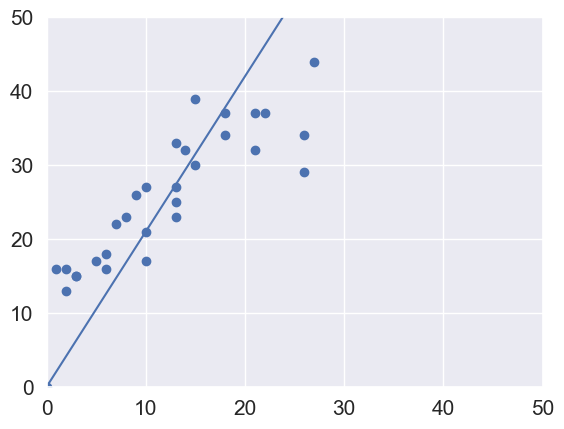

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Plotting Data
plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
plt.plot(X, Y, "bo")

# Plotting Linear Regression Line
xy1 = (X[0], Y[0])
slope = 2.1
prediction = predict(20, 2.1)
plt.axline(xy1=xy1, slope=2.1, label=f'${xy1} \\rightarrow {xy2}$')

plt.show()

In [73]:
def predict(X, w, b):
    return X * w + b

52.0

In [77]:
def loss(X, Y, w, b):
    # ** is exponent operators, power to 2 (ie squaring)
    return np.average((predict(X, w, b) - Y) ** 2)

In [55]:
loss(X, Y, 2.1)

80.80129032258066

In [78]:
def train(X, Y, iterations, lr): # lr -> learning rate (or 'step' size)
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))
        
        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr 
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b
    raise Exception("Couldn't converge within %d iterations" % iterations)

In [81]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
w, b = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f, b=%.3f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 786.645161
Iteration    1 => Loss: 778.858594
Iteration    2 => Loss: 771.114374
Iteration    3 => Loss: 763.412503
Iteration    4 => Loss: 755.752981
Iteration    5 => Loss: 748.135806
Iteration    6 => Loss: 740.560981
Iteration    7 => Loss: 733.028503
Iteration    8 => Loss: 725.538374
Iteration    9 => Loss: 718.090594
Iteration   10 => Loss: 710.685161
Iteration   11 => Loss: 703.322077
Iteration   12 => Loss: 696.001342
Iteration   13 => Loss: 688.722955
Iteration   14 => Loss: 681.486916
Iteration   15 => Loss: 674.293226
Iteration   16 => Loss: 667.141884
Iteration   17 => Loss: 660.032890
Iteration   18 => Loss: 652.966245
Iteration   19 => Loss: 645.941948
Iteration   20 => Loss: 638.960000
Iteration   21 => Loss: 632.020400
Iteration   22 => Loss: 625.123148
Iteration   23 => Loss: 618.268245
Iteration   24 => Loss: 611.455690
Iteration   25 => Loss: 604.685484
Iteration   26 => Loss: 597.957626
Iteration   27 => Loss: 591.272116
Iteration   28 => Lo

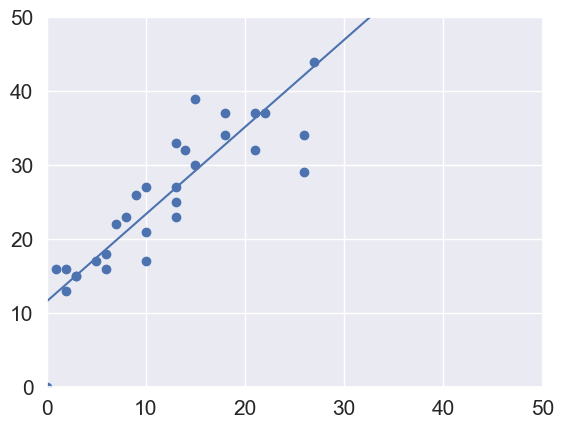

In [85]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
xy1 = (X[0], Y[0] + b)
plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(X, Y, "bo")
plt.axline(xy1=xy1, slope=w, label=f'${xy1}')

plt.show()

In [86]:
def gradient(X, Y, w):
    # X * (predict(X, w, 0)) is our predicted y
    # Y is our real y
    # We average the values to get the loss
    # then use 2 to get the gradient
    return 2 * np.average(X * (predict(X, w, 0) - Y))

# train using gradient descent()
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, 0)))
        # The gradient can be negative or positive, so we can use -= with reasonable confidence
        # The loss here will continue to decrease, will never increase, only ever get smaller
        w -= gradient(X, Y, w) * lr
    return w

In [87]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
w = train(X, Y, iterations=100, lr=0.001)
print("\nw=%.10f" % w)

Iteration    0 => Loss: 786.6451612903
Iteration    1 => Loss: 306.1164700555
Iteration    2 => Loss: 146.4027419255
Iteration    3 => Loss: 93.3185548239
Iteration    4 => Loss: 75.6749185928
Iteration    5 => Loss: 69.8106882739
Iteration    6 => Loss: 67.8615890757
Iteration    7 => Loss: 67.2137653242
Iteration    8 => Loss: 66.9984475952
Iteration    9 => Loss: 66.9268822592
Iteration   10 => Loss: 66.9030960278
Iteration   11 => Loss: 66.8951901780
Iteration   12 => Loss: 66.8925625040
Iteration   13 => Loss: 66.8916891417
Iteration   14 => Loss: 66.8913988616
Iteration   15 => Loss: 66.8913023809
Iteration   16 => Loss: 66.8912703136
Iteration   17 => Loss: 66.8912596553
Iteration   18 => Loss: 66.8912561128
Iteration   19 => Loss: 66.8912549354
Iteration   20 => Loss: 66.8912545441
Iteration   21 => Loss: 66.8912544140
Iteration   22 => Loss: 66.8912543708
Iteration   23 => Loss: 66.8912543564
Iteration   24 => Loss: 66.8912543516
Iteration   25 => Loss: 66.8912543500
Iteration

In [97]:
import numpy as np

def predict(X, w, b):
    return X * w + b

def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

def gradient(X, Y, w, b):
    w_gradient =  2 * np.average(X * (predict(X, w, b) - Y))
    b_gradient =  2 * np.average(predict(X, w, b) - Y)
    return (w_gradient, b_gradient)
    
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, b)))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr # multiply by a fraction ends up in smaller numbers
        b -= b_gradient * lr
    return w, b

In [99]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
w, b = train(X, Y, iterations=20000, lr=0.001)
print("\nw=%.10f, b=%.10f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 786.6451612903
Iteration    1 => Loss: 304.4105352210
Iteration    2 => Loss: 144.8888516089
Iteration    3 => Loss: 92.0993956227
Iteration    4 => Loss: 74.6099677906
Iteration    5 => Loss: 68.7954998690
Iteration    6 => Loss: 66.8423748117
Iteration    7 => Loss: 66.1663625393
Iteration    8 => Loss: 65.9127698572
Iteration    9 => Loss: 65.7989204929
Iteration   10 => Loss: 65.7313237077
Iteration   11 => Loss: 65.6790588811
Iteration   12 => Loss: 65.6318994675
Iteration   13 => Loss: 65.5864631590
Iteration   14 => Loss: 65.5416312709
Iteration   15 => Loss: 65.4970337758
Iteration   16 => Loss: 65.4525482533
Iteration   17 => Loss: 65.4081341747
Iteration   18 => Loss: 65.3637780962
Iteration   19 => Loss: 65.3194755316
Iteration   20 => Loss: 65.2752249574
Iteration   21 => Loss: 65.2310258300
Iteration   22 => Loss: 65.1868779301
Iteration   23 => Loss: 65.1427811456
Iteration   24 => Loss: 65.0987353996
Iteration   25 => Loss: 65.0547406275
Iteration